# Pair Programming

In [5]:
import numpy as np

In [32]:
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def maker(N,n_vars,kind = 'linear'):
    """A function to generate Monte Carlo linear regression data"""
    x = []    #an empty list to hold the data
    y = np.zeros(N)    #an array to hold the dependent variable
    b = []    #an empty list to hold the true bs
    i = 1
    while i <= n_vars:    #loop over the variables we want to create
        x_i = np.random.normal(loc = 0.0, scale = 1.0, size = N)    #generate the data
        x.append(x_i)    #add it to the list of data
        b_i = np.random.normal(loc = 0.0, scale = 1.0)    #draw a random effect for this variable
        b.append(b_i)    #add it to the list of effects
        y = y + b_i*x_i    #add the variable effect to the dependent variable
        i += 1    #index up i
    
    x.append(np.ones(N))    #and a column of ones for a constant
    b_i = np.random.normal(loc = 0.0, scale = 1.0)    #draw a random intercept
    b.append(b_i)    #append this intercept to the effects
    if kind == 'linear':
        y = b_i + y + np.random.normal(loc = 0.0, scale = 1.0, size = N)    #add the normally distributed error term and the intercept
    if kind == 'logit':
        y = (np.random.uniform(0,1,len(y)) < np.exp(b_i + y)/(1 + np.exp(b_i + y)))*1
    return [np.array(x).T,np.array(y),np.array(b)]

In [7]:
Data = maker(100000,3,kind = 'logit')    #make logit data
X = Data[0]    #pull out explanatory variables
y = Data[1]    #pull out dependent variable
b = Data[2]    #pull out true coefficients

In [37]:
rf_scores = []
dt_scores = []
for i in range(10,101,10):
    data = maker(10000, i, kind='logit')
    X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.2, random_state=2)
    
    dt = DecisionTreeClassifier(random_state=2)
    dt_scores.append(np.mean(cross_val_score(dt, X_train, y_train, cv=10)))
    
    rf = RandomForestClassifier(random_state=2)
    rf_scores.append(np.mean(cross_val_score(rf, X_train, y_train, cv=10)))    
    

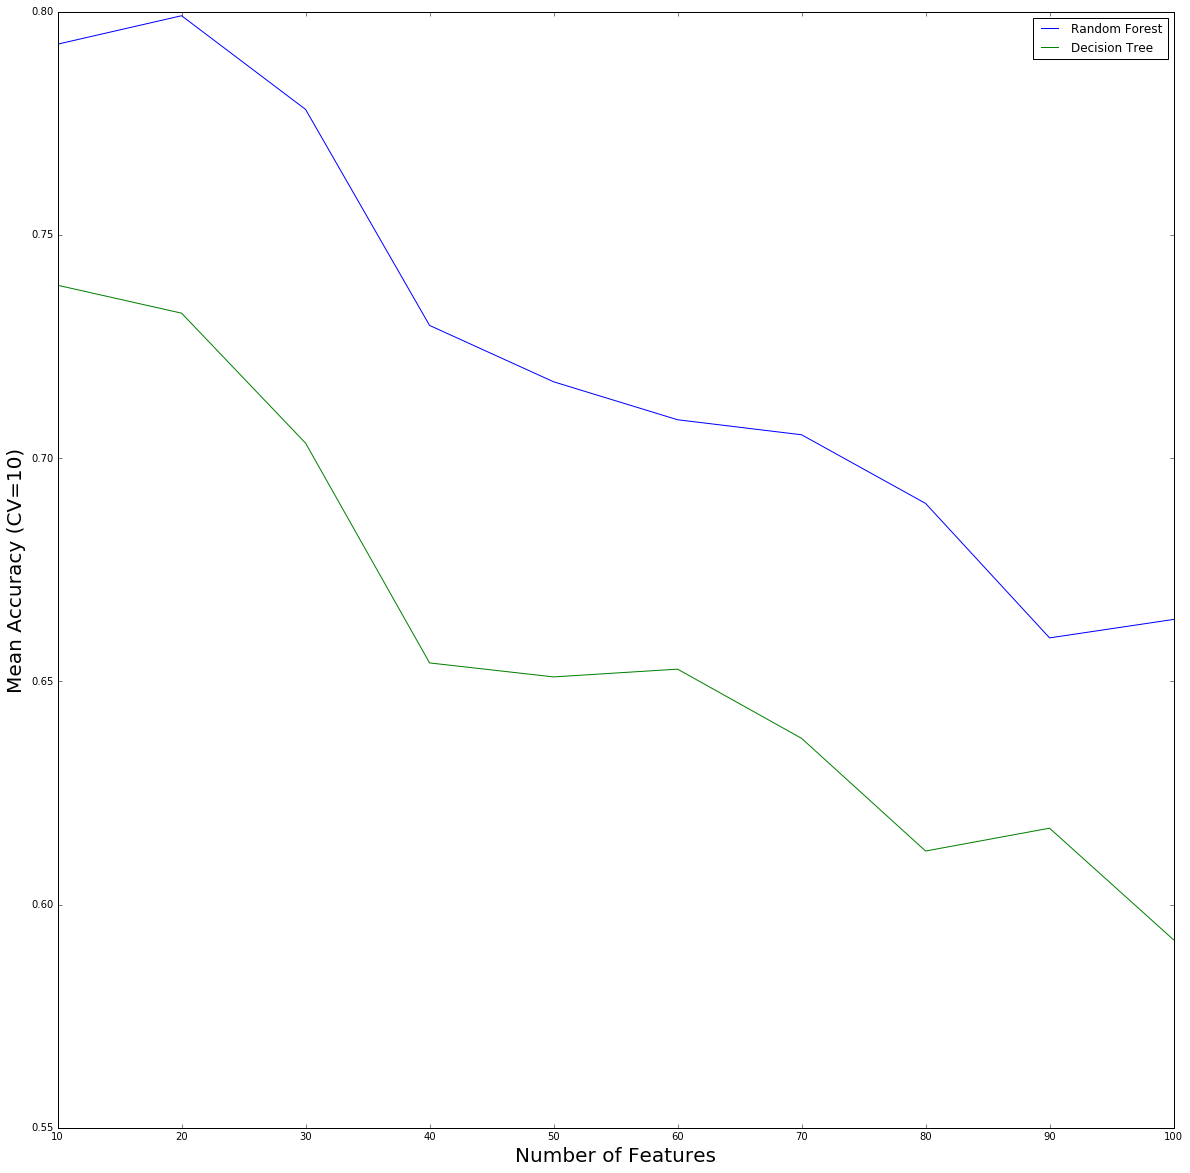

In [39]:
plt.figure(figsize=(20,20))

plt.plot(range(10,101,10), rf_scores, label='Random Forest')
plt.plot(range(10,101,10), dt_scores, label='Decision Tree')
plt.xlabel('Number of Features', fontsize=20)
plt.ylabel('Mean Accuracy (CV=10)', fontsize=20)
plt.legend();